# Oemer - End-to-End OMR

Given a music score image, which can also be phone taken, this tool will parse and generate the result file in MusicXML format, which can be further edited easily with other tools such as Musescore.

In [4]:
#@title Setup

%add-apt-repository --yes ppa:mscore-ubuntu/mscore3-stable
%apt-get update
%apt-get --yes install musescore3 libmagic-dev

%pip install oemer

%load_ext autoreload
%autoreload 2

UsageError: Line magic function `%add-apt-repository` not found.


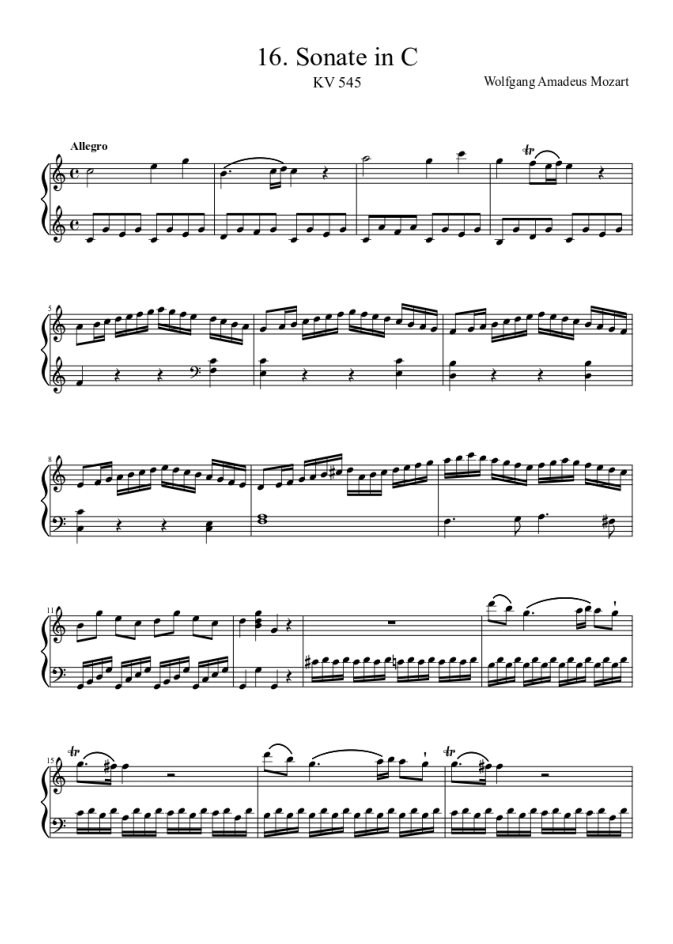

In [2]:
#@title Upload Image



import matplotlib.pyplot as plt
import cv2
import os


img_path = "/Users/harikoornala/Downloads/Test/score_0.png"
basename = img_path.replace(".jpg", "").replace(".png", "")

os.environ['img_path'] = img_path
os.environ['basename'] = basename

plt.rcParams['figure.figsize'] = (12, 12)
plt.axis('off')
img = cv2.imread(img_path)
plt.imshow(img)
plt.show()

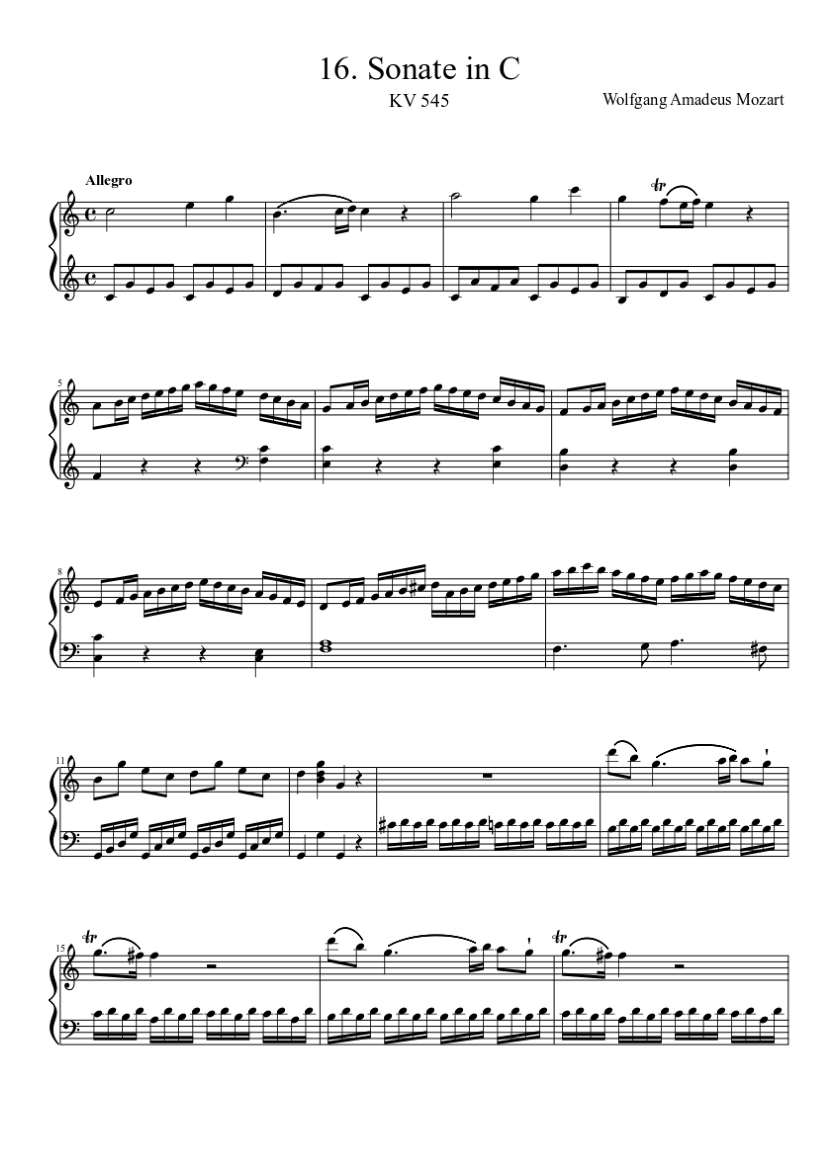

ValueError: rate must be specified when data is a numpy array or list of audio samples.

In [3]:
#@title Run Recoginition
%env DEBIAN_FRONTEND=noninteractive
%env QT_QPA_PLATFORM=offscreen

import IPython.display as dsp

!oemer "$img_path"

!musescore3 -o "${basename}.mp3" $basename.musicxml
!musescore3 -o "${basename}.png" $basename.musicxml


dsp.clear_output()
img = plt.imread(f"{basename}.png")
plt.rcParams['figure.figsize'] = (15, 15)
plt.axis('off')
plt.imshow(img)
plt.show()

dsp.display(dsp.Audio(f"{basename}.mp3"))